My Spotify Playlist Analysis
 
 playlist here https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF

I decided to analysis a spotify's playlist for the global top 50 songs and see if there where any correlation and or anything significant with song features and where they rank on the playlist. I did this by performing a hypthesis test and finding the p-value to see if there is any signifcance with the 2 variables . Please see ipynb file

In [5]:
#importing my libraries 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import pandas as pd

In [6]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id="personal", client_secret="personal")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [7]:
#making a function to call a playlist and turning it into a df
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [8]:
#calling function to get df
df = call_playlist("spotify","37i9dQZEVXbNG2KDcFcKOF" )

C:\Users\spotm\AppData\Local\Temp\ipykernel_166624\1282024064.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)


In [9]:
#since thisplay list is sorted my streams desc i used the index to rank them 
df['rank'] = df.index+1

In [43]:
#checking if dataframe looks good
df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank
0,Sabrina Carpenter,Espresso,Espresso,2qSkIjg1o9h3YT9RAgYN75,0.701,0.760,0,-5.478,1,0.0285,0.000065,0.1850,0.6900,103.969,175459,4,1
1,Eminem,Houdini,Houdini,2HYFX63wP3otVIvopRS99Z,0.936,0.887,9,-2.760,0,0.0683,0.000002,0.0582,0.8890,127.003,227239,4,2
2,Billie Eilish,HIT ME HARD AND SOFT,BIRDS OF A FEATHER,6dOtVTDdiauQNBQEDOtlAB,0.747,0.507,2,-10.171,1,0.0358,0.060800,0.1170,0.4380,104.978,210373,4,3
3,Tommy Richman,MILLION DOLLAR BABY,MILLION DOLLAR BABY,5AJ9hqTS2wcFQCELCFRO7A,0.852,0.697,1,-5.520,0,0.0439,0.000370,0.0678,0.9190,138.029,155152,4,4
4,Billie Eilish,HIT ME HARD AND SOFT,LUNCH,629DixmZGHc7ILtEntuiWE,0.893,0.400,11,-7.981,0,0.0643,0.082300,0.0632,0.9450,124.987,179587,4,5
5,FloyyMenor,Gata Only,Gata Only,6XjDF6nds4DE2BBbagZol6,0.791,0.499,8,-8.472,0,0.0509,0.000024,0.0899,0.6690,99.986,222000,4,6
6,Post Malone,I Had Some Help,I Had Some Help (Feat. Morgan Wallen),7221xIgOnuakPdLqT0F3nP,0.638,0.855,7,-4.860,1,0.0264,0.000000,0.2450,0.7310,127.986,178206,4,7
7,Kendrick Lamar,Not Like Us,Not Like Us,6AI3ezQ4o3HUoP6Dhudph3,0.898,0.472,1,-7.001,1,0.0776,0.000000,0.1410,0.2140,101.061,274192,4,8
8,Hozier,Unreal Unearth: Unheard,Too Sweet,5Z0UnEtpLDQyYlWwgi8m9C,0.741,0.620,10,-5.505,1,0.0412,0.000809,0.0398,0.9340,117.038,251424,4,9
9,Artemas,i like the way you kiss me,i like the way you kiss me,2GxrNKugF82CnoRFbQfzPf,0.599,0.946,11,-4.263,1,0.0447,0.010600,0.0826,0.7470,151.647,142515,4,10


Our Rank is our dependent variable and any audio features are our independent variable. Our null hypothesis is that there is no correlation between song ranking and audio features.

PearsonRResult(statistic=-0.26436419369963865, pvalue=0.06356567732778828)

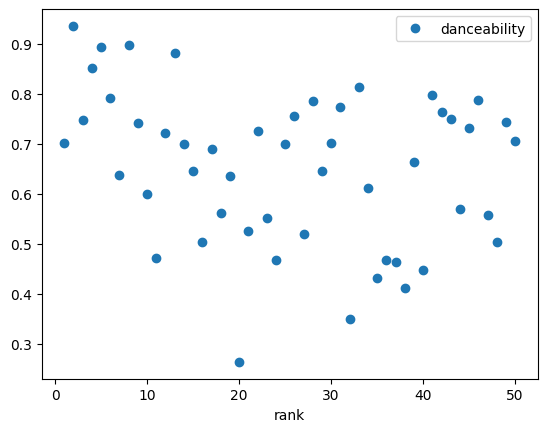

In [21]:
# first test rank agansit danceability 
df.plot(x='rank', y='danceability', style = 'o')
pearsonr(df['rank'], df['danceability'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.13551320908374156, pvalue=0.3480774631132973)

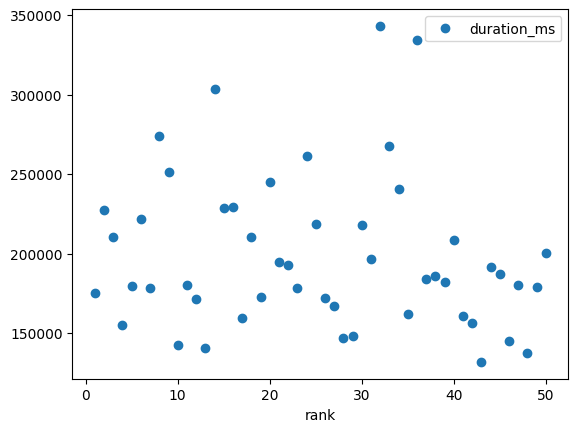

In [15]:
# song length
df.plot(x='rank', y='duration_ms', style = 'o')
pearsonr(df['rank'], df['duration_ms'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=0.03819018469152896, pvalue=0.7923107343990767)

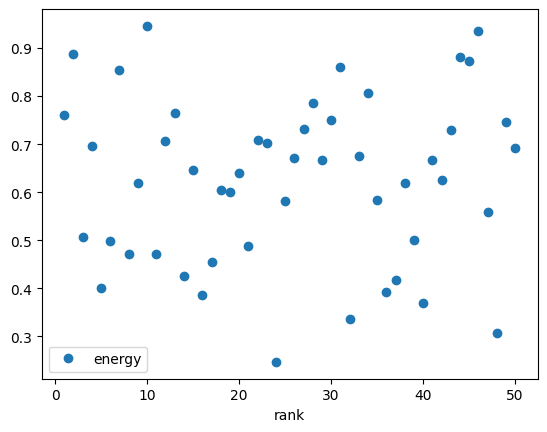

In [18]:
#energy
df.plot(x='rank', y='energy', style = 'o')
pearsonr(df['rank'], df['energy'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.051377392885988214, pvalue=0.7230852390325964)

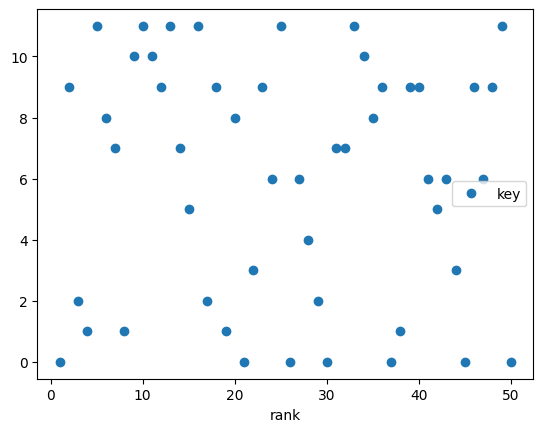

In [20]:
#key
df.plot(x='rank', y='key', style = 'o')
pearsonr(df['rank'], df['key'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.01719482433908719, pvalue=0.9056562774475414)

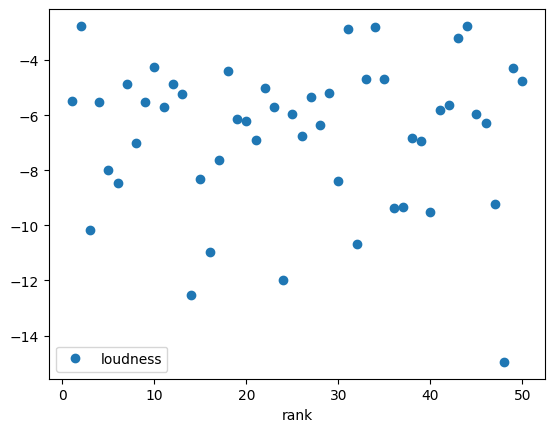

In [23]:
#loudness
df.plot(x='rank', y='loudness', style = 'o')
pearsonr(df['rank'], df['loudness'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.021942561675087964, pvalue=0.8797776431840195)

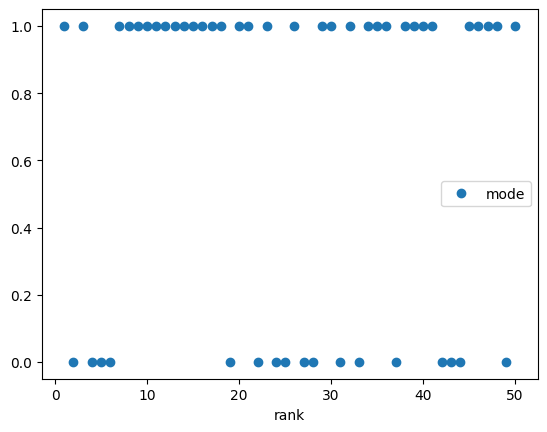

In [25]:
#mode
df.plot(x='rank', y='mode', style = 'o')
pearsonr(df['rank'], df['mode'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=0.17881672601647208, pvalue=0.21405677133149953)

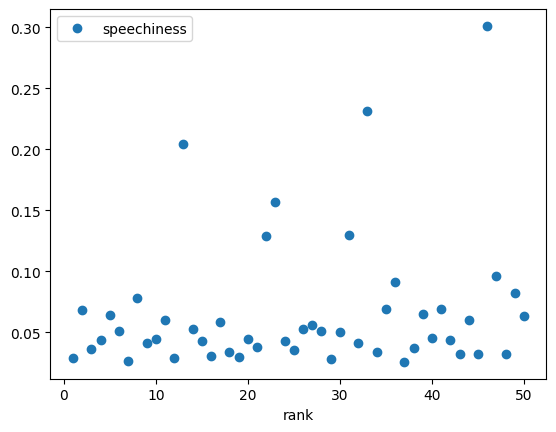

In [29]:
#speechiness
df.plot(x='rank', y='speechiness', style = 'o')
pearsonr(df['rank'], df['speechiness'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.009982085053842333, pvalue=0.945148503152543)

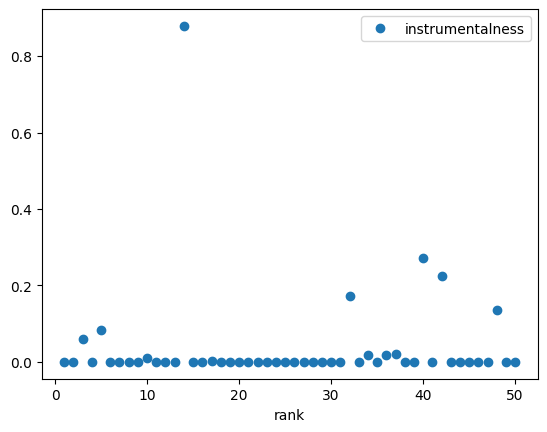

In [31]:
#instrumentalness
df.plot(x='rank', y='instrumentalness', style = 'o')
pearsonr(df['rank'], df['instrumentalness'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=0.2527554727268009, pvalue=0.07657310228597423)

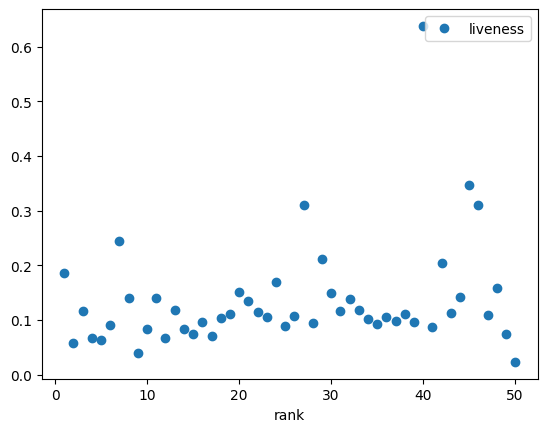

In [34]:
#loudness
df.plot(x='rank', y='liveness', style = 'o')
pearsonr(df['rank'], df['liveness'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.21111322845033936, pvalue=0.14110647763183903)

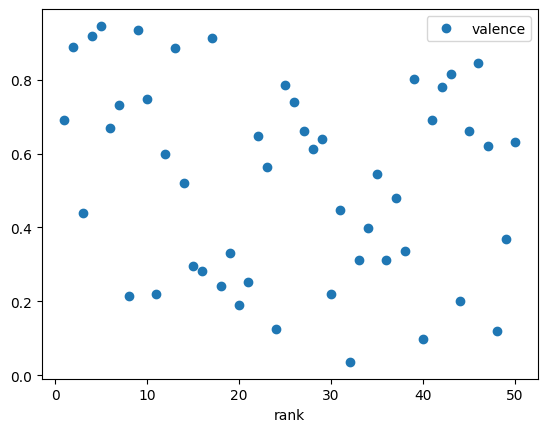

In [45]:
#valence
df.plot(x='rank', y='valence', style = 'o')
pearsonr(df['rank'], df['valence'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=-0.15777565484860195, pvalue=0.2738251666587822)

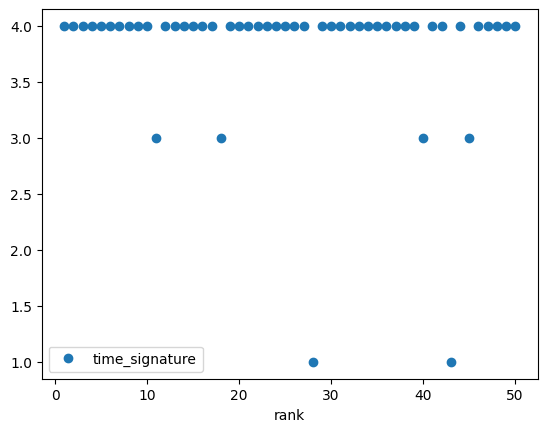

In [39]:
#time signature
df.plot(x='rank', y='time_signature', style = 'o')
pearsonr(df['rank'], df['time_signature'])
#pvalue is above the .05 we cant reject the null hypothesis

PearsonRResult(statistic=0.08412132588096077, pvalue=0.5613659966033933)

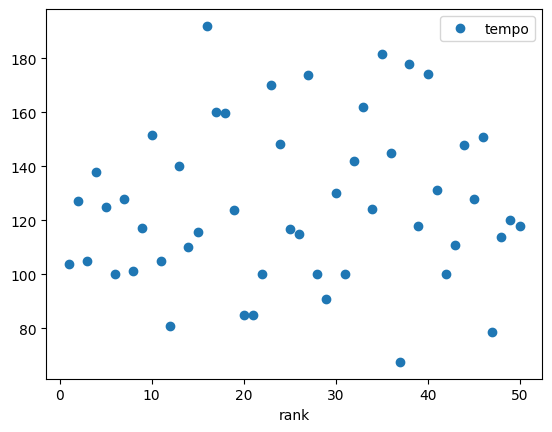

In [41]:
#tempo
df.plot(x='rank', y='tempo', style = 'o')
pearsonr(df['rank'], df['tempo'])
#pvalue is above the .05 we cant reject the null hypothesis

Conclusion 

Out of all the sound atrriburtes and ranking we can determine that there is not signicances between song features and chart rankings out of the global 100 playlist 
